# Case 1 (Part I): House price prediction

In this case (Part I), you will build a multilayer perceptron network to predict the selling price of properties. The dataset consists of all single family houses and condos that were sold in Denver in a given year.

You need to submit the following files on canvas site:

- A report in the pdf format containing the plots of the training errors for the multi-layer perception model and the linear regression model, and the answers to the two questions below. You should also provide interpretations and implications of each plot/table in your report. It is not enough to simply put a chart or a table of numbers in the report and expect the audience to understand what the chart means and what it implies. The point is to provide some insights for an audience like senior management at Zillow.

- The complete Jupyter notebook containing all your Pytorch code with explanations, along with a Markdown text explaining different parts if needed.




---
## Kaggle community competition: Prof. X's Prize


You need to set up a Kaggle account and joined the Kaggle competition by following the [link](https://www.kaggle.com/t/414a77c12150407d97e39fae245e34ef).

- Name your team as Section_X_Team_Y, where X is either A or B or C or D, and Y is your team number.
- One of the team members can serve as team leader and invite other members of your team to join the team.

- Each team can submit at most 20 predictions daily

To get the test error for your model, you need to submit your predicted prices for test data on Kaggle. See Kaggle competition website for more detailed instructions. Note that in Part I of the case, you do not need to worry about optimizing your model to get the lowest error possible. The Part I will be graded based on your implemention of the base models as specified below.  We will come back to optimize the model and compete for Prof. X's Prize in Part II of the case.

---
## Data Loading and Visualize Data


The train data and test data are available on the Kaggle competition website.
You need to first download them, then upload them to the google colab, and then read the data using pandas.

In [1]:
import pandas as pd  # Importing pandas, which is a library for data manipulation and analysis
#Read the datasets
train_df =pd.read_csv("train.csv")
test_df =pd.read_csv("test.csv")

### Visualization of SALE PRICES in train data

Let's take a closer look at the sale prices in the train data.

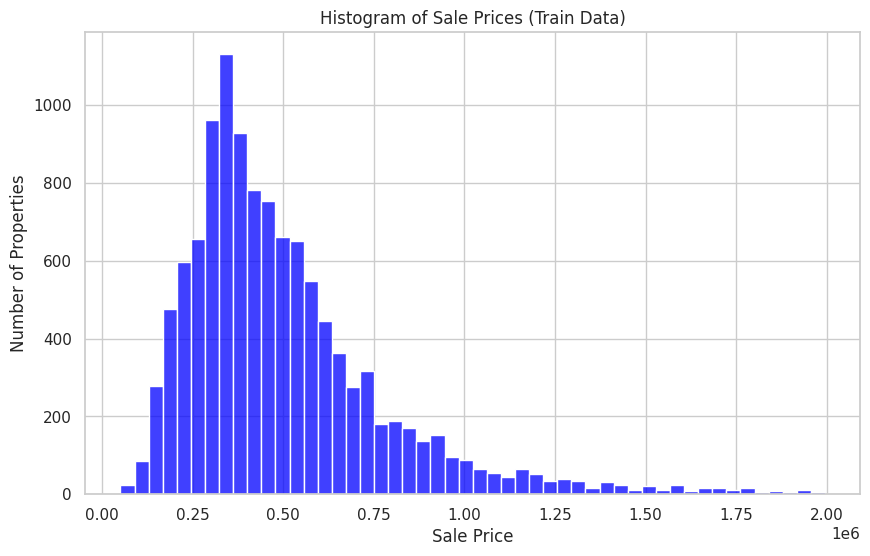

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt  # Importing matplotlib's pyplot for making plots and charts

# Set the style
sns.set(style="whitegrid")

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SALE_PRICE'], bins=50, color='blue')
plt.title('Histogram of Sale Prices (Train Data)')
plt.xlabel('Sale Price')
plt.ylabel('Number of Properties')
plt.show()

---
## Data Preparation

The first step when building a neural network model is getting your data into the proper form to feed into the network.

- **Train labels**: We need to extract the sale prices from the train data as train labels. Since the house prices can take very large values, to make training fast it is helpful to define the train labels as the sale prices divided by a normalization factor.

- **Handing non-numeric features**: Some of the house features are non-numeric. We will learn about how to process categorical data in the upcoming lectures. For now, you can  remove those non-numeric features and only train over the numeric features.

- **Feature standardization**: When predicting house prices, you started from features that took a variety of ranges—some features had small floating-point values, and others had fairly large integer values. The model might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice for dealing with such data is to do feature-wise normalization: for each feature in the input data (a column in the input dataframe), we subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has
a unit standard deviation. **Note**: We need to ensure that the train and test data go through the same normalization.

- **Handling missing values**: There may exist some entries with missing values. After the feature standardization, we can impute the missing values with zeros.

We see that the sale_price in train data has a wide range from 50K to 2 million, with the median price 431K. We can divide the sale_price by 100K, so the normalized sale_price is between 0.5 and 20 in training data. Remember, when we output the predicted price for the test data, we need to multiply back the normalization factor.

In [3]:
#TODO: define labels for train data as the sale prices divided by $100,000
normalization_factor=100000
train_labels = train_df['SALE_PRICE'].values/normalization_factor

In [4]:
train_labels.shape

(11581,)

In [5]:
train_df.shape

(11581, 17)

In [6]:
train_features = train_df.drop(columns=['SALE_PRICE',"NBHD","STYLE_CN","PROP_CLASS","ID"])
test_features = test_df.drop(columns=["NBHD","STYLE_CN","PROP_CLASS","ID"])
train_features = train_features.fillna(0)
test_features = test_features.fillna(0)

In [7]:
#TODO: Write code to construct feature vectors for train and test data after data preparation.
mean = train_features.mean()
std = train_features.std()

train_features = (train_features - mean) / std
test_features = (test_features - mean) / std

In [8]:
test_features.head()

,LIVING_SQFT,FBSMT_SQFT,BSMT_AREA,LAND_SQFT,GRD_AREA,BLDG_AGE,RM_AGE,BED_RMS,FULL_B,HLF_B,STORY,UNITS
0,0.209929,-0.69386,-0.825868,-0.620054,-0.164812,-1.185637,-0.489922,0.616695,1.079871,1.071766,2.334342,-0.103904
1,-0.409719,-0.69386,-0.174264,0.487927,-0.164812,2.164388,1.649457,0.616695,-0.059627,-0.778028,-0.754466,-0.103904
2,-0.200818,0.37254,0.200139,2.245891,6.349859,0.253827,-0.489922,1.730535,1.079871,-0.778028,-0.754466,-0.103904
3,-0.591803,-0.69386,-0.825868,-1.137034,-0.164812,-0.740712,-0.489922,-0.497145,-0.059627,-0.778028,-0.754466,-0.103904
4,0.384955,1.18727,0.938144,0.817545,-0.164812,0.855784,-0.489922,0.616695,1.079871,-0.778028,-0.754466,-0.103904


In [9]:
train_features.head()

,LIVING_SQFT,FBSMT_SQFT,BSMT_AREA,LAND_SQFT,GRD_AREA,BLDG_AGE,RM_AGE,BED_RMS,FULL_B,HLF_B,STORY,UNITS
0,-0.744245,-0.693860,-0.825868,-1.137034,-0.164812,0.358515,0.121329,-0.497145,-0.059627,-0.778028,-0.754466,-0.103904
1,1.245969,1.225661,0.880543,-0.233475,-0.164812,-1.054777,-0.489922,0.616695,2.219369,1.071766,2.334342,-0.103904
2,-0.644028,0.920670,0.626742,1.436302,-0.164812,0.541720,0.426955,0.616695,-0.059627,-0.778028,-0.754466,-0.103904
3,-0.817643,-0.693860,-0.825868,0.626713,-0.164812,0.803440,1.802270,-0.497145,-1.199124,-0.778028,-0.754466,-0.103904
4,0.386366,-0.693860,-0.825868,-0.512494,-0.164812,-1.185637,-0.489922,0.616695,-0.059627,1.071766,0.789938,-0.103904


Finally, we convert features and labels to PyTorch tensors.

In [10]:
import torch
import numpy as np

# Convert training features and labels to PyTorch tensors
train_features = torch.tensor(train_features.values.astype(np.float32), dtype=torch.float32)
test_features = torch.tensor(test_features.values.astype(np.float32), dtype=torch.float32)
train_labels = torch.tensor(train_labels.reshape(-1, 1).astype(np.float32), dtype=torch.float32)

---
## DataLoaders and Batching

After creating training, test, and validation data, we can create DataLoaders for this data by following two steps:
1. Create a known format for accessing our data, using [TensorDataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset) which takes in an input set of data and a target set of data with the same first dimension, and creates a dataset.
2. Create DataLoaders and batch our training, validation, and test Tensor datasets. Note that we will shuffle the train data, so the model will not learn a particular order. For test data, we do not shuffle.

In [14]:
from torch.utils.data import TensorDataset, DataLoader
#  Create DataLoaders and batch our train data
train_data = TensorDataset(train_features, train_labels)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)

In [15]:
#TODO: Create DataLoaders and batch for test data
test_loader = DataLoader(test_features, batch_size=128, shuffle=False)

Let's take a batch to have a sanity check

In [16]:
# obtain one batch of training data
dataiter = iter(train_loader)
features, labels = next(dataiter)

print('Sample input size: ', features.size()) # batch_size, seq_length
print('Sample input: \n', features)
print()
print('Sample label size: ', labels.size()) # batch_size
print('Sample label: \n', labels[:10])

Sample input size:  torch.Size([128, 12])
Sample input: 
 tensor([[-0.9390, -0.6939, -0.8259,  ..., -0.7780, -0.7545, -0.1039],
        [-0.9870, -0.6939, -0.8259,  ..., -0.7780, -0.7545, -0.1039],
        [-0.8515, -0.6939, -0.8259,  ..., -0.7780, -0.7545, -0.1039],
        ...,
        [-0.0187,  0.6839,  0.3981,  ...,  1.0718,  0.7899, -0.1039],
        [-0.3448, -0.6939,  0.2451,  ...,  1.0718,  0.7899, -0.1039],
        [ 0.3398,  0.1059,  0.2433,  ...,  1.0718,  0.7899, -0.1039]])

Sample label size:  torch.Size([128, 1])
Sample label: 
 tensor([[2.6616],
        [2.6500],
        [3.2500],
        [7.3856],
        [4.6000],
        [6.2000],
        [5.0600],
        [4.5000],
        [3.9000],
        [6.1250]])


---
## Linear regression as benchmark

Let us first build a linear regression model as a benchmark.

In [35]:
#TODO: Build a linear regression model network
lin_net = torch.nn.Linear(train_features.shape[1], 1)

Let's take a batch and see the output

In [36]:
features, labels = next(dataiter)
output=lin_net(features)
output.shape,labels.shape

(torch.Size([128, 1]), torch.Size([128, 1]))

## Train the model

First, we will use GPU training if it is availabe.

In [37]:
#TODO: use GPU for training if it is availabe
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
lin_net.to(device)

Using device: cpu


Linear(in_features=12, out_features=1, bias=True)

Second, let us specify the loss function.

In [38]:
#TODO: specify the loss function for training
criterion = torch.nn.MSELoss()

We are now ready to train the network.


Note that with house prices, as with stock prices, we care about relative quantities more than absolute quantities. Thus we tend to care more about the relative error than about the absolute error. For instance, if our prediction is off by \\$100,000 when estimating the sale price of a house which is \\$125,000, then we are probably doing a horrible job. On the other hand, if we err by this amount for a house with sale price \\$2 million, this might represent a pretty  accurate prediction.

To this end, we will use the median error rate (MER) used by [Zestimate](https://www.zillow.com/z/zestimate/) to measure the predictive performance. The error rate is defined as
$$
\text{Error Rate} = \left| \frac{\text{Predicted Price}-\text{Actual Price}}{\text{Actual Price}} \right|
$$
The median error rate is defined as the median of error rates for all properties.

In [39]:
#TODO: Write code to train the network
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

optimizer = optim.Adam(lin_net.parameters(), lr=0.001)

num_epochs = 100
train_mer_list = []

for epoch in range(num_epochs):
    lin_net.train()
    epoch_losses = []

    for features, labels in train_loader:

        features, labels = features.to(device), labels.to(device)

        outputs = lin_net(features)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_losses.append(loss.item())

    avg_loss = np.mean(epoch_losses)

    lin_net.eval()
    with torch.no_grad():
        predictions = lin_net(train_features.to(device)).cpu().numpy()
        actuals = train_labels.cpu().numpy()
        error_rates = np.abs((predictions - actuals) / actuals)
        mer = np.median(error_rates)
        train_mer_list.append(mer)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, MER: {mer:.4f}')

Epoch [1/100], Loss: 33.0491, MER: 0.9858
Epoch [2/100], Loss: 30.8492, MER: 0.9823
Epoch [3/100], Loss: 29.1842, MER: 0.9615
Epoch [4/100], Loss: 27.6793, MER: 0.9492
Epoch [5/100], Loss: 26.5259, MER: 0.9330
Epoch [6/100], Loss: 25.4531, MER: 0.9149
Epoch [7/100], Loss: 24.5494, MER: 0.8953
Epoch [8/100], Loss: 23.6826, MER: 0.8762
Epoch [9/100], Loss: 22.8484, MER: 0.8575
Epoch [10/100], Loss: 22.0557, MER: 0.8418
Epoch [11/100], Loss: 21.3350, MER: 0.8243
Epoch [12/100], Loss: 20.5904, MER: 0.8082
Epoch [13/100], Loss: 19.9100, MER: 0.7943
Epoch [14/100], Loss: 19.2114, MER: 0.7794
Epoch [15/100], Loss: 18.5526, MER: 0.7647
Epoch [16/100], Loss: 17.9044, MER: 0.7495
Epoch [17/100], Loss: 17.3020, MER: 0.7353
Epoch [18/100], Loss: 16.7145, MER: 0.7195
Epoch [19/100], Loss: 16.1405, MER: 0.7049
Epoch [20/100], Loss: 15.5885, MER: 0.6878
Epoch [21/100], Loss: 15.0496, MER: 0.6727
Epoch [22/100], Loss: 14.5222, MER: 0.6570
Epoch [23/100], Loss: 14.0181, MER: 0.6418
Epoch [24/100], Loss

Plot the training error (MER) over epochs

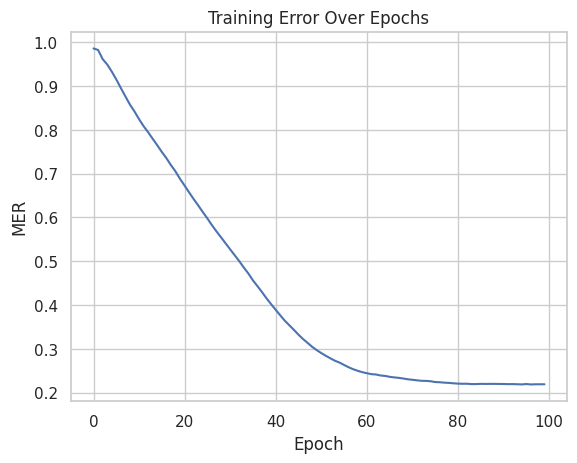

In [40]:
#TODO: Write code to plot the training error (MER) over epochs
plt.plot(train_mer_list)
plt.xlabel('Epoch')
plt.ylabel('MER')
plt.title('Training Error Over Epochs')
plt.show()

---
## Build the Multi-layer Perceptron Base Model

In the following, we build a multi-layer perception model.

In [28]:
#TODO: Build a multi-layer perception neural network with 2 hidden layers of sizes 256 and 128, respectively and ReLu activations
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.network(x)

mlp_net = MLP(train_features.shape[1]).to(device)

In [29]:
#TODO: write code to train the MLP network
# Set up loss function (MSE) and optimizer (Adam) with learning rate scheduler\
#criterion = nn.MSELoss()
criterion = torch.nn.SmoothL1Loss()
optimizer = torch.optim.AdamW(mlp_net.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)
# Training parameters
num_epochs = 100
mlp_mer_list = []

for epoch in range(num_epochs):
    mlp_net.train()
    epoch_loss = 0

    for features, labels in train_loader:
        features, labels = features.to(device), labels.to(device)

        # Forward pass
        outputs = mlp_net(features)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(mlp_net.parameters(), max_norm=1.0)
        optimizer.step()

        epoch_loss += loss.item()

    # Step the learning rate scheduler
    scheduler.step()

    # Calculate MER on the training set for this epoch
    mlp_net.eval()
    with torch.no_grad():
        predictions = mlp_net(train_features.to(device)).cpu().numpy()
        actuals = train_labels.cpu().numpy()
        error_rates = np.abs(predictions - actuals) / (np.abs(actuals) + 1e-8)
        mer = np.median(error_rates)
        mlp_mer_list.append(mer)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/len(train_loader):.4f}, MER: {mer:.4f}")



Epoch [1/100], Loss: 1.5110, MER: 0.1968
Epoch [2/100], Loss: 0.8210, MER: 0.1775
Epoch [3/100], Loss: 0.7619, MER: 0.1762
Epoch [4/100], Loss: 0.7364, MER: 0.1664
Epoch [5/100], Loss: 0.7175, MER: 0.1634
Epoch [6/100], Loss: 0.7047, MER: 0.1585
Epoch [7/100], Loss: 0.6996, MER: 0.1568
Epoch [8/100], Loss: 0.6902, MER: 0.1532
Epoch [9/100], Loss: 0.6797, MER: 0.1567
Epoch [10/100], Loss: 0.6718, MER: 0.1564
Epoch [11/100], Loss: 0.6579, MER: 0.1488
Epoch [12/100], Loss: 0.6531, MER: 0.1482
Epoch [13/100], Loss: 0.6486, MER: 0.1518
Epoch [14/100], Loss: 0.6445, MER: 0.1477
Epoch [15/100], Loss: 0.6405, MER: 0.1483
Epoch [16/100], Loss: 0.6362, MER: 0.1444
Epoch [17/100], Loss: 0.6344, MER: 0.1450
Epoch [18/100], Loss: 0.6308, MER: 0.1422
Epoch [19/100], Loss: 0.6248, MER: 0.1420
Epoch [20/100], Loss: 0.6243, MER: 0.1435
Epoch [21/100], Loss: 0.6194, MER: 0.1417
Epoch [22/100], Loss: 0.6139, MER: 0.1415
Epoch [23/100], Loss: 0.6144, MER: 0.1413
Epoch [24/100], Loss: 0.6132, MER: 0.1413
E

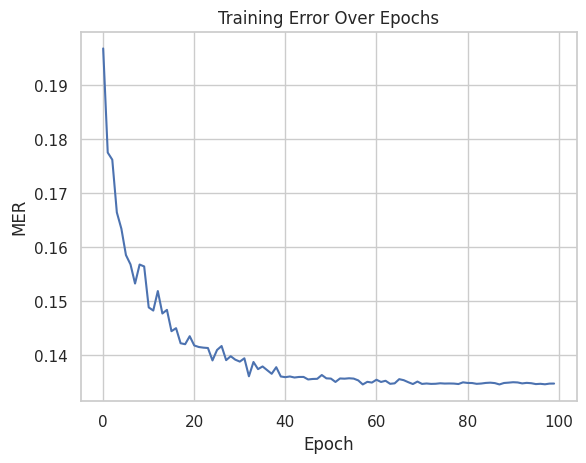

In [30]:
#TODO: Write code to plot the training error (MER) over epochs
plt.plot(mlp_mer_list)
plt.xlabel('Epoch')
plt.ylabel('MER')
plt.title('Training Error Over Epochs')
plt.show()

**Question 1**: What are your final training errors of the multilayer perception model and the linear regression model?

In [41]:
print(train_mer_list[-1])
print(mlp_mer_list[-1])

0.21941586
0.13469726


---
## Inference on test data

After the MLP model is trained, we can use it for inference.

In [31]:
mlp_net.eval()

normalization_factor = 100000

with torch.no_grad():
    test_predictions = mlp_net(test_features)

test_predictions = test_predictions * normalization_factor

test_predictions = test_predictions.cpu().numpy()


In [32]:
#TODO: save the predicted sale prices into submission_csv
import pandas as pd

submission = pd.DataFrame({
    "ID": test_df["ID"],
    "SALE_PRICE": test_predictions.flatten()
})

submission.to_csv("submission.csv", index=False)


Now, we can submit our predictions on Kaggle and see how they compare with the actual house prices (labels) on the test set.

- Log in to the Kaggle website and visit the house price prediction competition page.

- Click the “Submit Predictions”.

- Click the “Browse Files” button in the dashed box at the bottom of the page and select the prediction file you wish to upload.

- Click the “Submit” button at the bottom of the page to view your results.

**Question 2**: What is the test error shown on Kaggle? How does it compare with the train error?